In [2]:
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-08-24 20:13:51.167962: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def ROC_CURVE_3CAT(test_y,prob_test_vec):
    n_classes = 3
    fpr = [0] * 3
    tpr = [0] * 3
    thresholds = [0] * 3
    auc_score = [0] * 3
    lbls = ['White','African-American','Asian']
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(test_y[:, i],
                                                prob_test_vec[:, i])
        auc_score[i] = auc(fpr[i], tpr[i])
        
    plt.figure(dpi=150)
    for i in range(n_classes):
        
        plt.plot(fpr[i], tpr[i], label='ROC curve for {} (area = {:0.2f})'.format(lbls[i],auc_score[i]) )
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
    plt.grid(which='both')
    plt.show()
    classes_pred = np.argmax(prob_test_vec,axis=1)
    actual_class = np.argmax(test_y,axis=1)

    print(classification_report(y_true=actual_class, y_pred=classes_pred))
    cm = confusion_matrix(y_true=actual_class, y_pred=classes_pred)
    print(cm)

339/339 [==============================] - 1s 1ms/step


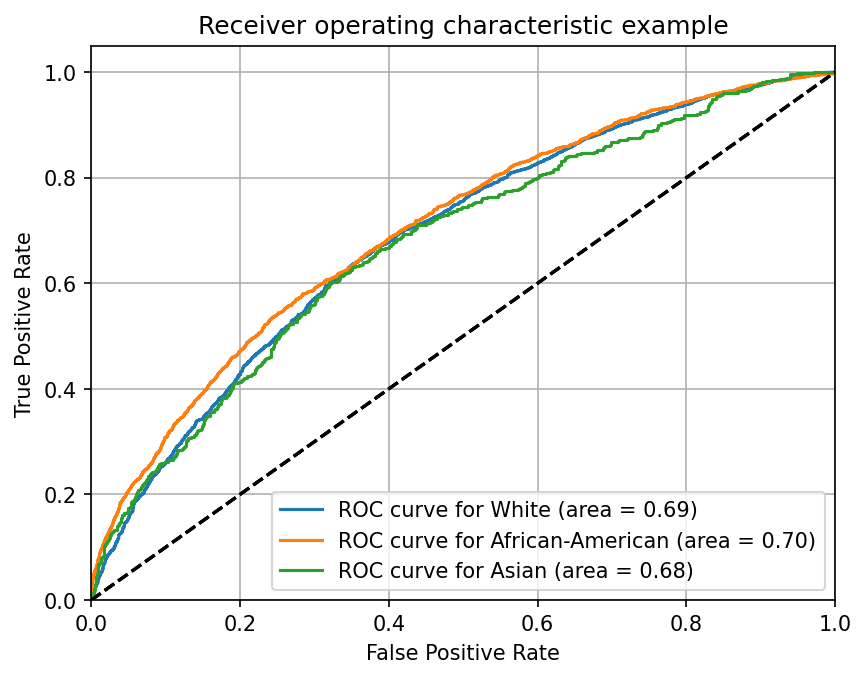

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      8484
           1       0.38      0.31      0.34      1884
           2       0.14      0.17      0.15       465

    accuracy                           0.73     10833
   macro avg       0.45      0.44      0.44     10833
weighted avg       0.72      0.73      0.72     10833

[[7222  873  389]
 [1184  583  117]
 [ 305   81   79]]


In [4]:
name = 'mimic_race_3categ_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

339/339 [==============================] - 0s 780us/step


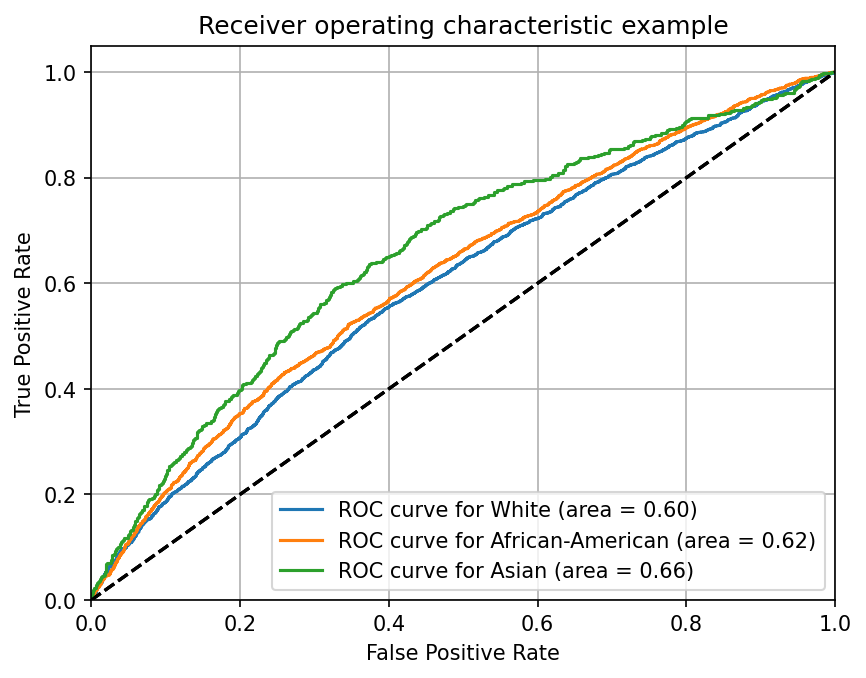

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      8484
           1       0.30      0.18      0.23      1884
           2       0.10      0.13      0.11       465

    accuracy                           0.71     10833
   macro avg       0.40      0.39      0.39     10833
weighted avg       0.68      0.71      0.69     10833

[[7281  750  453]
 [1457  343   84]
 [ 352   53   60]]


In [5]:
name = 'mimic_race_3categ_segment_0__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

339/339 [==============================] - 0s 1ms/step


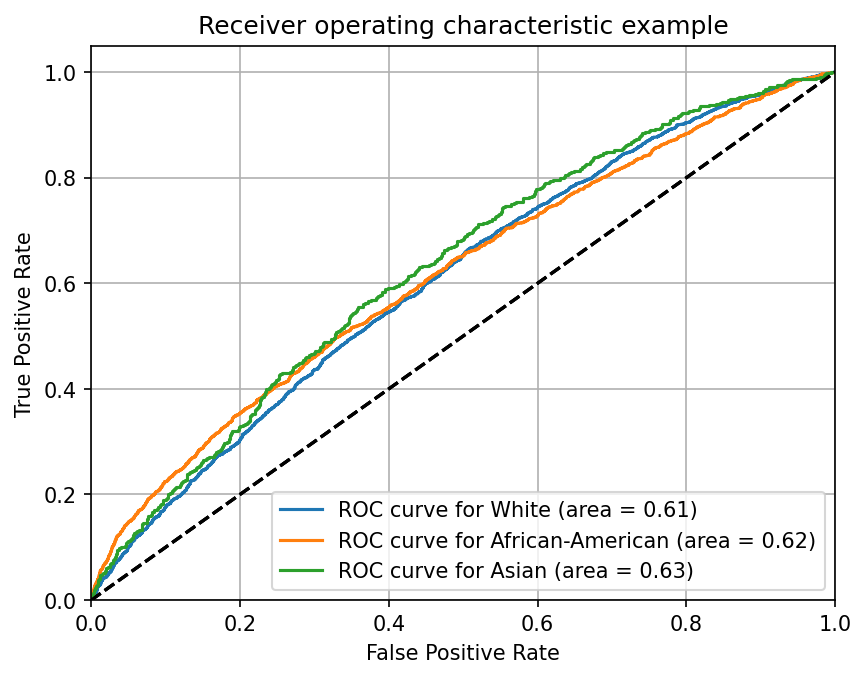

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      8484
           1       0.34      0.19      0.24      1884
           2       0.09      0.10      0.10       465

    accuracy                           0.73     10833
   macro avg       0.41      0.39      0.39     10833
weighted avg       0.69      0.73      0.71     10833

[[7510  642  332]
 [1436  350   98]
 [ 384   36   45]]


In [6]:
name = 'mimic_race_3categ_segment_1__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

339/339 [==============================] - 0s 861us/step


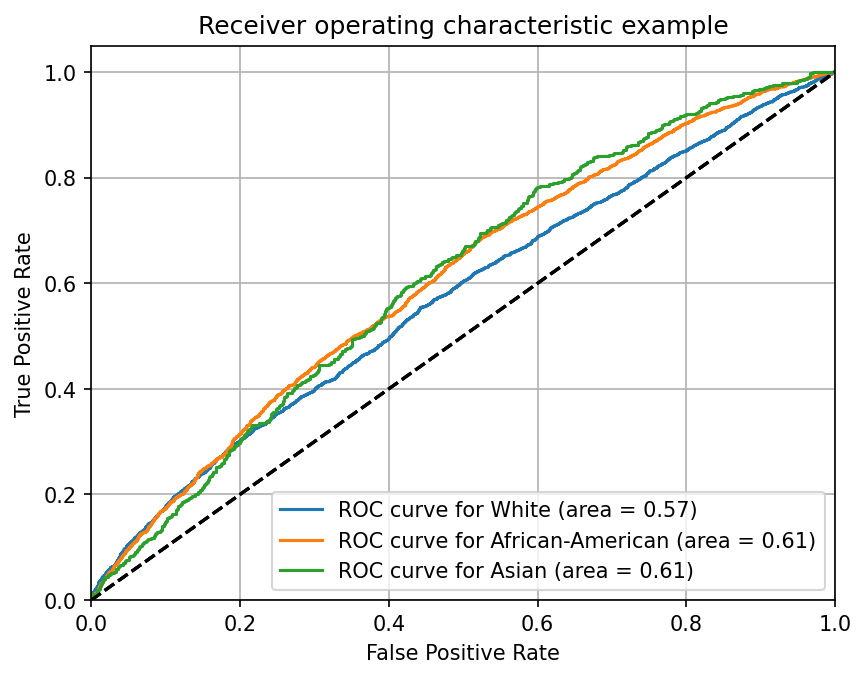

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      8484
           1       0.28      0.09      0.14      1884
           2       0.07      0.05      0.06       465

    accuracy                           0.74     10833
   macro avg       0.38      0.36      0.35     10833
weighted avg       0.67      0.74      0.69     10833

[[7809  423  252]
 [1653  173   58]
 [ 413   27   25]]


In [7]:
name = 'mimic_race_3categ_segment_2__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

339/339 [==============================] - 0s 1ms/step


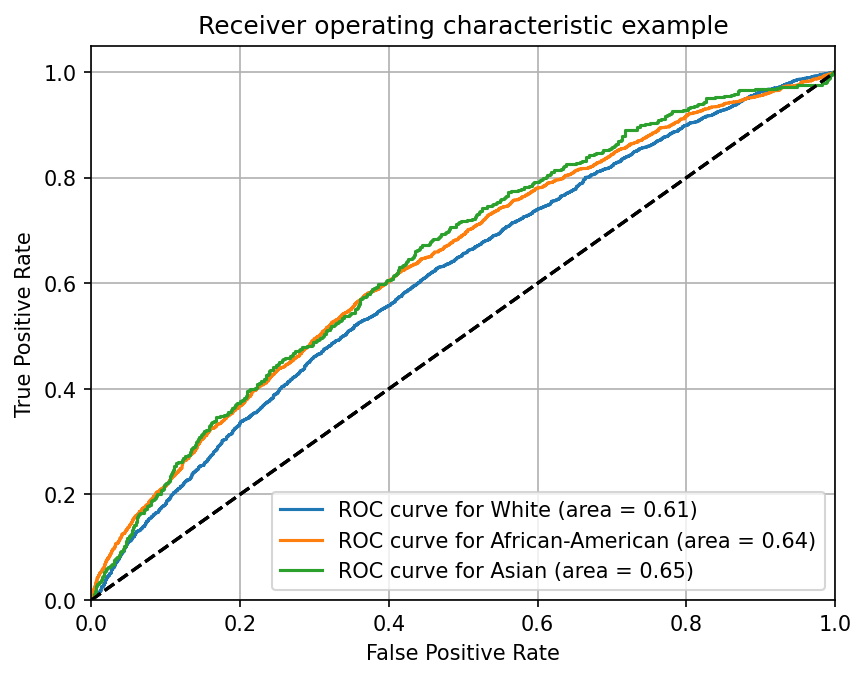

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      8484
           1       0.34      0.18      0.24      1884
           2       0.10      0.10      0.10       465

    accuracy                           0.73     10833
   macro avg       0.41      0.39      0.39     10833
weighted avg       0.69      0.73      0.71     10833

[[7501  640  343]
 [1456  347   81]
 [ 371   48   46]]


In [8]:
name = 'mimic_race_3categ_segment_3__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)